# 12. lekce: Cvičení

## NLP: Natural Language Processing

V tomto cvičení zkus naimplementovat klasifikátor, který rozpozná pozitivní recenzi produktu od
negativní. Takové úloze se občas říká _sentiment analysis_.

Pracuj se souborem [reviews.csv](data/reviews.csv). Soubor obsahuje text recenze, a výstupní proměnnou `label` se dvěma hodnotami, `neg` a `pos`. Můžeš si všimnout, že data už nějakým čištěním prošla. Porovnej alespoň dva algoritmy. Jaké je nejlepší f1-score, kterého jsi dosáhl/a?

In [49]:
import pandas
import requests
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
# Načtení dat
data = pandas.read_csv("data/reviews.csv")
display(data.head())

# Zobrazení celého textu jedné pozitivní a jedné negativní recenze
display( data[data["label"]=="pos"].iloc[0]["review"] )
display( data[data["label"]=="neg"].iloc[1]["review"] )

,label,product,review
0,neg,music,the cd came as promised and in the condition p...
1,neg,dvd,this was a very annoying and boring flick that...
2,neg,health,the braun ls-5550 silk&soft bodyshave recharge...
3,pos,camera,"when it comes to buying camcorders , i persona..."
4,neg,dvd,i had high hopes for this series when i starte...


"when it comes to buying camcorders , i personally like the one with the build in memory . but after using this camcorder i was forced to change my mind . unlike other sony camcorders , first of all , it offers upto 40x zoom which is a lot . its a good use of your money . you can have it for under $400 and still works better than a lot of choices out there . easy to use , touch screen , takes still photos , has a good speaker so it 's easier to record video and voice , fits into your palm so to speak , and if you use rewritable mini dvds , you would n't have to worry about go out of memory . so when it comes to sony camcorders , i would say the better quality of this one would get the job done properly ."

"this was a very annoying and boring flick thats barely watchable and throughout the film i kept looking at my watch , the film is not a historical drama nor is it an autobiographical film about william shakespreare infact it is a romantic comedy disguised as a historical drama . my girlfriend insisted that we watch this film together but i was n't in the mood she forced me to watch this , the film was about a struggling young writer shakespeare played by joseph fiennes who falls in love with lady viola played by gwyneth paltro who also happens to inspire his famous play romeo and juliet , this film also won a couple of oscars including gwyny for best actress but i felt like the film was just not that funny because all the characters seemed to talk in an old english style thats hard to understand . overall the film was just o.k. i think that some of the sets and costumes were fantastic and judi dench was great as queen elizabeth but i never want to watch this film again , if your a sha

In [51]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
X = data["review"]
y = data["label"]

# Rozdělení dat na trénovací a testovací sadu
# (stratify=y zařídí rovnoměrné/vyvážené rozdělení dat podle štítků v proměnné y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

- Porovnej alespoň dva algoritmy. Jaké je nejlepší f1-score, kterého jsi dosáhl/a?

In [52]:
# Bonus: Příprava pipeline (zásobníku? sekvence? potrubí?), která obsahuje:
#  1. Matici zastoupení slov
#  2. Klasifikátor
# ... pipeline umožňuje "hromadně" v sekvenci využívat všechny zařazené součásti
pipeline = Pipeline(
    [
        # Matice zastoupení slov, vyzkoušíme dvě varianty: TfidfVectorizer a CountVectorizer
        ("vec", TfidfVectorizer(ngram_range=(1, 2))),
        # ("vec", CountVectorizer()),

        # Klasifikátor, vyzkoušíme dvě varianty: KNN a SVC
        # ... pozor, KNN trvá dlouho, u mě asi 90 vteřin, výsledná accuracy je 0.68
        # ... SVC při použití CountVectorizer() nekonverguje k řešení a dává warning, proto zvýšíme max. počet iterací pomocí max_iter=10_000
        # ("clf", KNeighborsClassifier(n_neighbors=10)),
        ("clf", LinearSVC(random_state=0, max_iter=10_000)),
    ]
)
# ... parametr ngram_range=(1, 2) zařídí rozdělení do samostatných slov a zároveň i do dvojic slov

display(pipeline)

# "Provedení" pipeline
pipeline.fit(X_train, y_train)

# Klasifikace testovacích dat
y_pred = pipeline.predict(X_test)

# Výpočet a zobrazení zaokrouhlených statistik
# (print pomocí f-stringů: na místě složených závorek v řetězci se zobrazí výsledek kódu uvnitř závorek)
print(f"accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"f1 score: {round(f1_score(y_test, y_pred, average='weighted'), 2)}")

Pipeline(steps=[('vec', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC(max_iter=10000, random_state=0))])

accuracy: 0.83
f1 score: 0.83


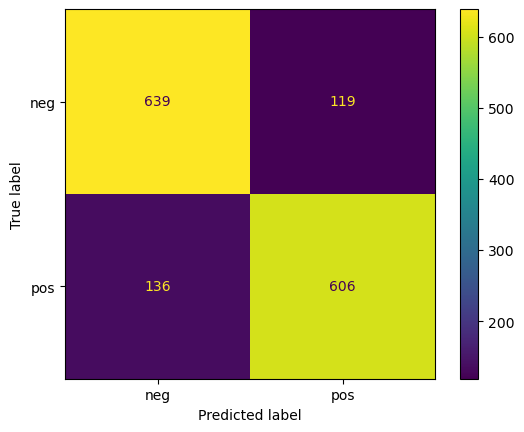

In [53]:
# Zobrazení matice záměn
ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    y_test,
)

### Bonus 1

Identifikuj ty recenze, které tvůj model označil špatně. Na pár z nich se podívej, a zkus odvodit, proč model chyboval.

In [54]:
# Převod dat do DataFrame
df = pandas.DataFrame({"text": X_test, "true": y_test, "pred": y_pred}).reset_index(
    drop=True
)

df.head()

,text,true,pred
0,"i bought this book , the paperback version . t...",neg,neg
1,i 'm a zone diet believer - but this book is a...,neg,neg
2,i have an r717 camera . i bought the dock too ...,neg,neg
3,i love this backpack ! it is just what i neede...,pos,pos
4,i have been waiting for this dvd to come out f...,pos,pos


In [55]:
# Výběr nesprávně klasifikovaných dat
misclassified = df[df["true"] != df["pred"]]

# Zobrazení jednoho záznamu
display(misclassified.loc[1489])

# Zobrazení celého textu recenze daného záznamu díky převedení Series do seznamu
print(misclassified.loc[1489].to_list())

text    there 's too much drama going on in this discu...
true                                                  pos
pred                                                  neg
Name: 1489, dtype: object

["there 's too much drama going on in this discussion ! i do n't really care about what year these episodes came out or that there are 9 missing episodes of the new scooby doo movies . i 'm just glad there 's more scooby ! !", 'pos', 'neg']


### Bonus 2

Všimni si, že soubor obsahuje také sloupec `product`, který identifikuje kategorii produktu.

1. Mohlo by být zajímavé se podívat, jestli je možné data do těchto kategorií shlukovat bez využití této informace. Data normalizuj (například pomocí `TfidfVectorizer`), a zkus spustit nějaký shlukovací algoritmus, například `KMeans`. Výsledky shlukování můžeš "obarvit" správnými kategoriemi. Povedlo se modelu predikovat kategorie?

2. Vyzkoušej také klasifikaci do těchto kategorií. Které kategorie se těžko odlišují?

In [ ]:
# ...